# GRAPH ML PROJECT IMPLEMENTED USING PAGERANK ALGORITHM

## ANALYSIS OF MOVIELENS DATASET OF 20M RATINGS

In [111]:
import pandas as pd
import networkx as nx
import numpy as np
import csv

In [112]:
# Load the ratings and tags data
ratings_df = pd.read_csv('archive/rating.csv')
tags_df = pd.read_csv('archive/tag.csv')

In [3]:
# Create a graph of movies and users
G = nx.Graph()

In [4]:
# Add edges between movies and users based on ratings and tags
for _, row in ratings_df.iterrows():
    G.add_edge('u' + str(row['userId']), 'm' + str(row['movieId']), weight=row['rating'])
    
for _, row in tags_df.iterrows():
    G.add_edge('u' + str(row['userId']), 'm' + str(row['movieId']), weight=1)

In [5]:
# Initialize scores
movie_scores = {node: 1 / G.number_of_nodes() for node in G if node.startswith('m')}
user_scores = {node: 1 / G.number_of_nodes() for node in G if node.startswith('u')}

In [6]:
# Run the PageRank algorithm
alpha = 0.85
tolerance = 1e-6
max_iterations = 100
for i in range(max_iterations):
    # Update movie scores
    new_movie_scores = {}
    for movie in movie_scores:
        in_weight = 0
        if G.has_node(movie):
            for neighbor in G.neighbors(movie):
                if neighbor.startswith('u'):
                    in_weight += alpha * user_scores[neighbor] / G.degree(neighbor)
                else:
                    in_weight += (1 - alpha) * movie_scores[neighbor] / G.degree(neighbor)
            new_movie_scores[movie] = in_weight
    movie_norm = np.linalg.norm(list(new_movie_scores.values()), 1)
    new_movie_scores = {k: v / movie_norm for k, v in new_movie_scores.items()}
    
    # Update user scores
    new_user_scores = {}
    for user in user_scores:
        in_weight = 0
        if G.has_node(user):
            for neighbor in G.neighbors(user):
                if neighbor.startswith('m'):
                    in_weight += alpha * movie_scores[neighbor] / G.degree(neighbor)
                else:
                    in_weight += (1 - alpha) * user_scores[neighbor] / G.degree(neighbor)
            new_user_scores[user] = in_weight
    user_norm = np.linalg.norm(list(new_user_scores.values()), 1)
    new_user_scores = {k: v / user_norm for k, v in new_user_scores.items()}
    
    # Check for convergence
    movie_delta = np.linalg.norm(list(new_movie_scores.values()), 1) - np.linalg.norm(list(movie_scores.values()), 1)
    user_delta = np.linalg.norm(list(new_user_scores.values()), 1) - np.linalg.norm(list(user_scores.values()), 1)
    if movie_delta < tolerance and user_delta < tolerance:
        break
        
    # Update scores
    movie_scores = new_movie_scores
    user_scores = new_user_scores

In [7]:
# Print the top 20 movies and users by PageRank score
movies = {}
with open('movies.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader) # Skip header
    for row in reader:
        movie_id = int(float(row[0]))
        title = row[1]
        genres = row[2]
        movies[movie_id] = {'title': title, 'genres': genres}

In [8]:
print('Top 20 movies:')
top_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:20]
for movie, score in top_movies:
    movie_id = int(movie[1:])
    print(f"{movies[movie_id]['title']} ({movies[movie_id]['genres']}): {score}")

Top 20 movies:
Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller): 0.0062450512207127456
Shawshank Redemption, The (1994) (Crime|Drama): 0.006168641504968624
Forrest Gump (1994) (Comedy|Drama|Romance|War): 0.0058676301700552455
Silence of the Lambs, The (1991) (Crime|Horror|Thriller): 0.005725459685233989
Jurassic Park (1993) (Action|Adventure|Sci-Fi|Thriller): 0.005086414744628187
Apollo 13 (1995) (Adventure|Drama|IMAX): 0.004600712438752612
Braveheart (1995) (Action|Drama|War): 0.004582486250081818
Fugitive, The (1993) (Thriller): 0.004515138880229592
Dances with Wolves (1990) (Adventure|Drama|Western): 0.00441674626702072
Batman (1989) (Action|Crime|Thriller): 0.0044151119693557304
Star Wars: Episode IV - A New Hope (1977) (Action|Adventure|Sci-Fi): 0.00438770818175954
Schindler's List (1993) (Drama|War): 0.004285953826568606
Toy Story (1995) (Adventure|Animation|Children|Comedy|Fantasy): 0.004215370972028986
Terminator 2: Judgment Day (1991) (Action|Sci-Fi): 0.004072577748591945
Tru

In [9]:
print('\nTop 20 users:')
top_users = sorted(user_scores.items(), key=lambda x: x[1], reverse=True)[:20]
for user, score in top_users:
    user_id = int(user[1:])
    print(f"User {user_id}: {score}")


Top 20 users:
User 70201: 0.04130625780338801
User 118205: 0.016597328605277857
User 88738: 0.015590214701023404
User 131651: 0.013709222560458282
User 123297: 0.012624329546857521
User 131904: 0.01011078821336939
User 91193: 0.008028002076267948
User 130459: 0.007142977543975762
User 59477: 0.006738760831097849
User 26867: 0.0066677823985055295
User 59414: 0.0053011391990768625
User 130767: 0.005286207370869272
User 63147: 0.005080260771453914
User 68026: 0.00449678163479278
User 41267: 0.004227114502025072
User 121535: 0.004145824070505434
User 73026: 0.0038414107450680302
User 124998: 0.003691199399235971
User 80092: 0.0035482872533831363
User 28916: 0.003423128054899679


In [10]:
# Print the total number of nodes and edges in the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 165771
Number of edges: 20049024


In [11]:
movie_avg_pagerank = sum(movie_scores.values()) / len(movie_scores)
user_avg_pagerank = sum(user_scores.values()) / len(user_scores)
print(f"Average PageRank score for movies: {movie_avg_pagerank}")
print(f"Average PageRank score for users: {user_avg_pagerank}")

Average PageRank score for movies: 3.665957914803095e-05
Average PageRank score for users: 7.220581545637681e-06


In [13]:
from random import choice
source = choice(list(G.nodes()))
target = choice(list(G.nodes()))
shortest_path = nx.shortest_path(G, source=source, target=target)
print(f"Shortest path from {source} to {target}: {shortest_path}")

Shortest path from u45703 to u27453: ['u45703', 'm50', 'u27453']


C:\Users\admin\AppData\Local\Temp\ipykernel_18788\4291308459.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_counts.keys(), rotation=45, ha='right')


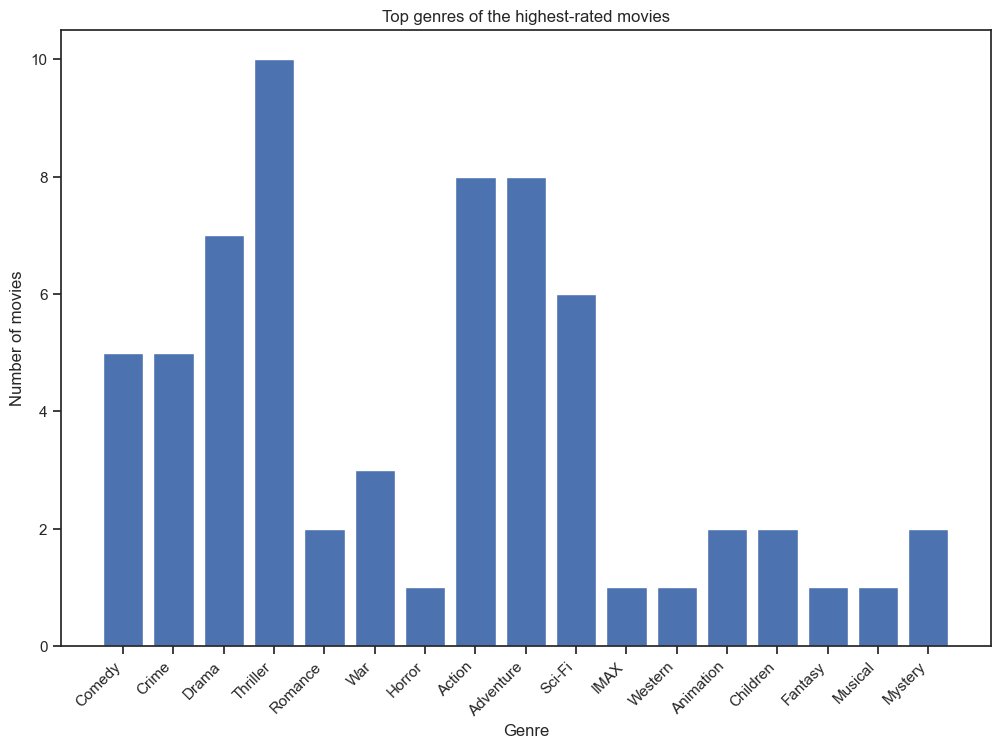

In [99]:
from collections import Counter

# Get the genres of the top-rated movies
top_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:20]
top_genres = []
for movie, score in top_movies:
    movie_id = int(movie[1:])
    genres = movies[movie_id]['genres'].split('|')
    top_genres.extend(genres)

# Count the occurrence of each genre
genre_counts = Counter(top_genres)

# Create a bar chart of the top genres
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(genre_counts.keys(), genre_counts.values())

# Add labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Number of movies')
ax.set_title('Top genres of the highest-rated movies')

# Rotate the horizontal labels for better visibility
ax.set_xticklabels(genre_counts.keys(), rotation=45, ha='right')

# Show the plot
plt.show()

In [20]:
avg_ratings = ratings_df.groupby('movieId')['rating'].mean()

In [21]:
top_tags = tags_df['tag'].value_counts().head(20)

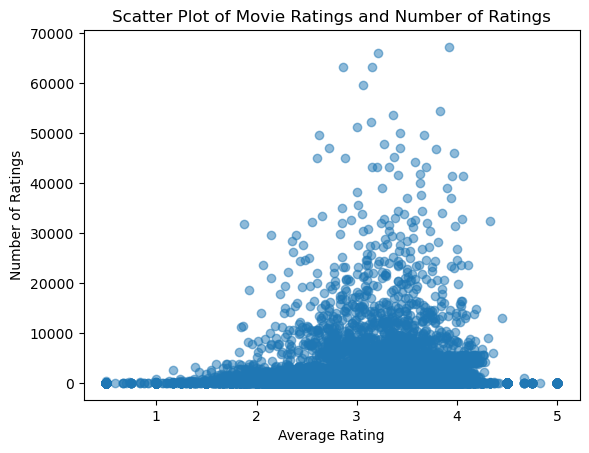

In [23]:
ratings_counts = ratings_df['movieId'].value_counts()
movie_ratings = pd.DataFrame({'movieId': ratings_counts.index, 'num_ratings': ratings_counts.values, 'avg_rating': avg_ratings})
plt.scatter(movie_ratings['avg_rating'], movie_ratings['num_ratings'], alpha=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Scatter Plot of Movie Ratings and Number of Ratings')
plt.show()

In [113]:
movies_df = pd.read_csv('archive/movie.csv')

In [38]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [40]:
tags_df.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [39]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [114]:
# merge the ratings_df and movies_df dataframes based on movieId column
df = pd.merge(ratings_df, movies_df, on='movieId')

# merge the df and tags_df dataframes based on userId and movieId columns
df = pd.merge(df, tags_df, on=['userId', 'movieId'])

# display the merged dataframe
print(df.head())

   userId  movieId  rating          timestamp_x           title  \
0    1629        2     3.5  2008-02-29 07:03:31  Jumanji (1995)   
1    1741        2     4.0  2002-11-27 17:33:05  Jumanji (1995)   
2    1741        2     4.0  2002-11-27 17:33:05  Jumanji (1995)   
3    1741        2     4.0  2002-11-27 17:33:05  Jumanji (1995)   
4    1741        2     4.0  2002-11-27 17:33:05  Jumanji (1995)   

                       genres                   tag          timestamp_y  
0  Adventure|Children|Fantasy           time travel  2014-03-10 17:42:00  
1  Adventure|Children|Fantasy     adapted from:book  2007-05-12 19:02:03  
2  Adventure|Children|Fantasy            board game  2007-06-25 00:07:16  
3  Adventure|Children|Fantasy  childhood recaptured  2007-05-12 19:02:03  
4  Adventure|Children|Fantasy                  game  2007-05-12 19:02:03  


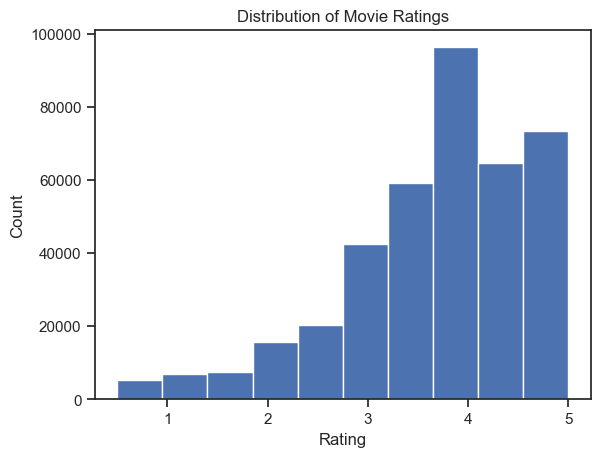

In [43]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

In [52]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp_x', 'title', 'genres', 'tag',
       'timestamp_y'],
      dtype='object')

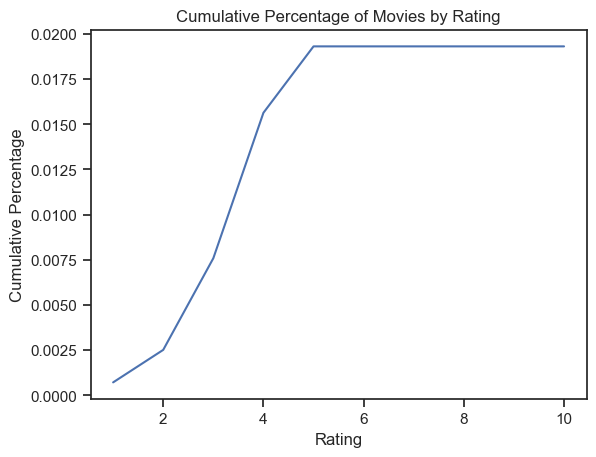

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the cumulative percentage of movies by rating
cumulative_percentages = np.cumsum(np.histogram(df['rating'], bins=10, range=(1,10))[0]) / len(ratings_df)

# Plot a line plot of the cumulative percentage of movies by rating
plt.plot(range(1,11), cumulative_percentages)
plt.xlabel('Rating')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Percentage of Movies by Rating')
plt.show()

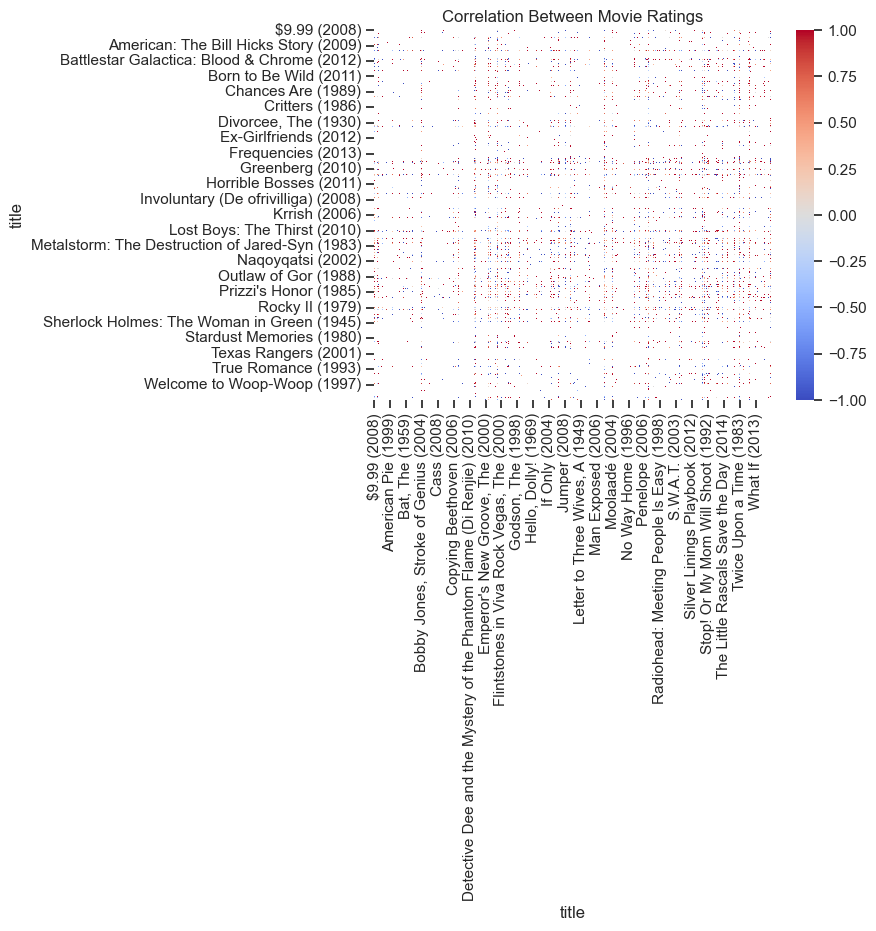

In [107]:
corr = df.pivot_table(index='userId', columns='title', values='rating')
corr = corr.corr(method='pearson')

sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Movie Ratings')
plt.show()

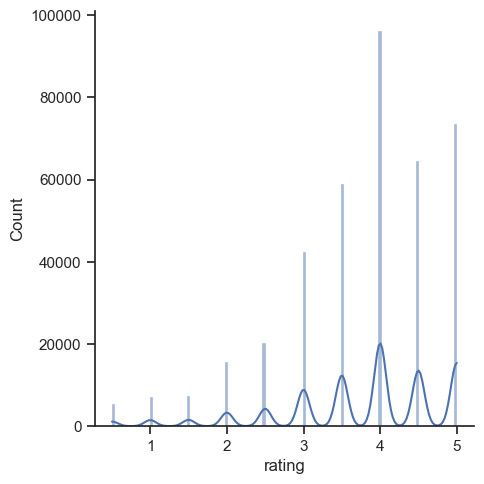

In [76]:
sns.displot(df['rating'], kde=True)

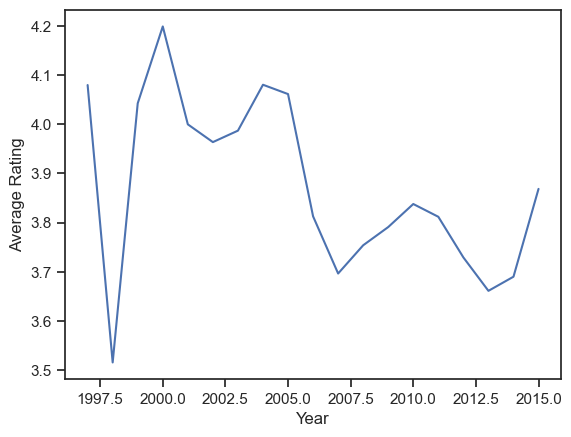

In [83]:
import seaborn as sns

avg_ratings_by_year = df.groupby('year')['rating'].mean()

sns.lineplot(x=avg_ratings_by_year.index, y=avg_ratings_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

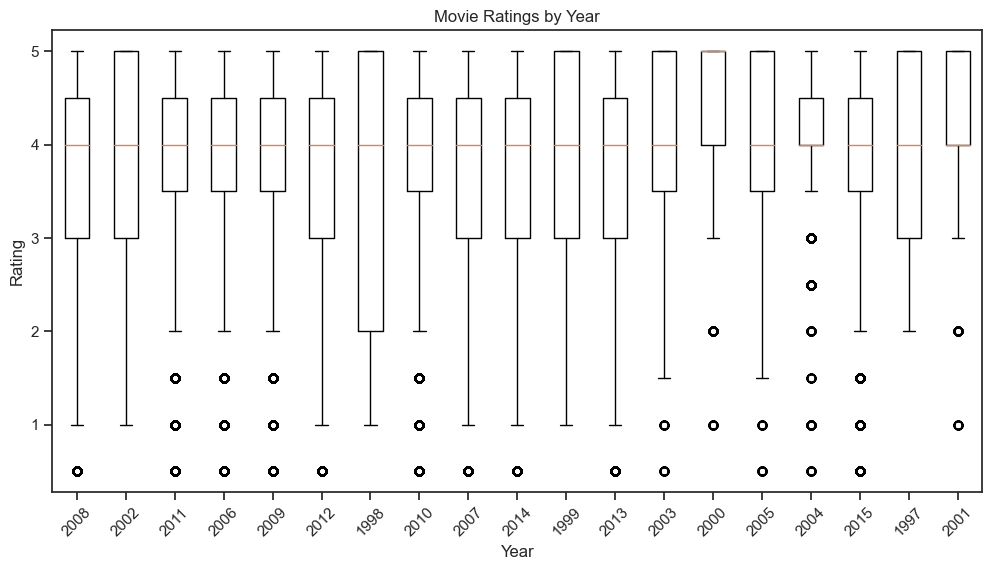

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot([df[df['year'] == year]['rating'] for year in df['year'].unique()])
ax.set_title('Movie Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
ax.set_xticks(range(1, len(df['year'].unique()) + 1))
ax.set_xticklabels(df['year'].unique(), rotation=45)
plt.show()

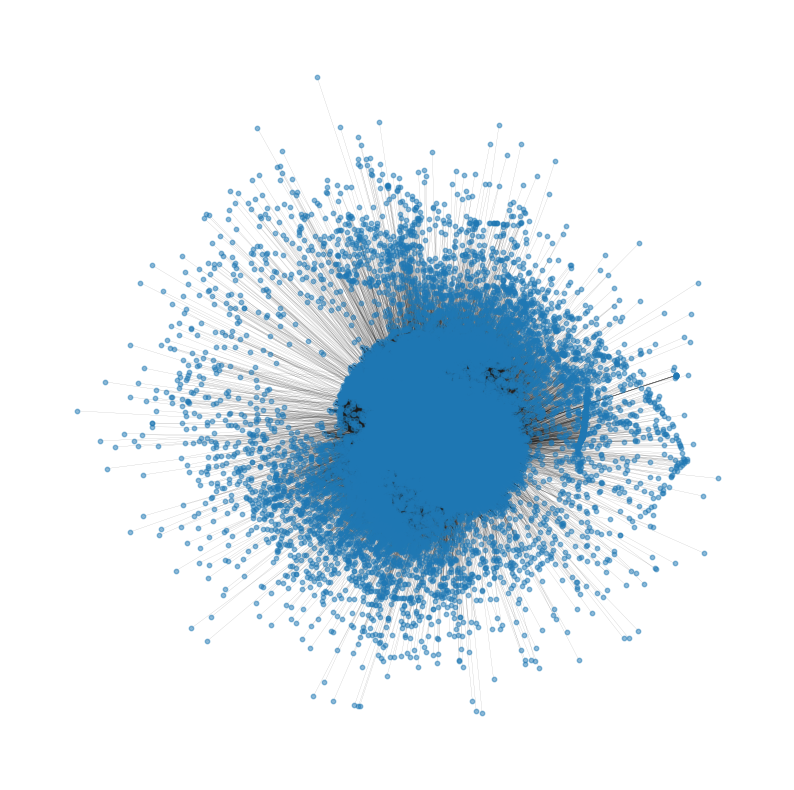

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))  # Increase the size to 10x10 inches

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, width=0.1, alpha=0.5, ax=ax)

# Show the plot
plt.show()

## MOVIE RECOMMENDATION BASED ON A PARTICULAR USER

In [120]:
# Create a user-movie bipartite graph
G = nx.Graph()
G.add_nodes_from(df['userId'], bipartite=0)
G.add_nodes_from(df['movieId'], bipartite=1)
G.add_weighted_edges_from(df[['userId', 'movieId', 'rating']].values)

# Run PageRank on the user-movie bipartite graph
pr = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

# Get user input
user = int(input("Enter a user ID: "))

# Get the movies that the user has not yet seen
watched_movies = df[df['userId'] == user]['movieId'].values
unwatched_movies = df[~df['movieId'].isin(watched_movies)]['movieId'].unique()

# Calculate the PageRank scores for the unwatched movies
scores = {movie: pr[movie] for movie in unwatched_movies}

# Recommend the top-scoring movies
recommended_movies = sorted(scores.keys(), key=lambda x: scores[x], reverse=True)[:10]

print("Recommended movies for user", user, ":")
for movie in recommended_movies:
    print(df[df['movieId'] == movie]['title'].iloc[0])

Enter a user ID: 47860
Recommended movies for user 47860 :
Bully (2001)
Pulp Fiction (1994)
Shawshank Redemption, The (1994)
Who Killed the Electric Car? (2006)
Silence of the Lambs, The (1991)
Thousand Words, A (2012)
Forrest Gump (1994)
Eternal Sunshine of the Spotless Mind (2004)
Usual Suspects, The (1995)
Inception (2010)


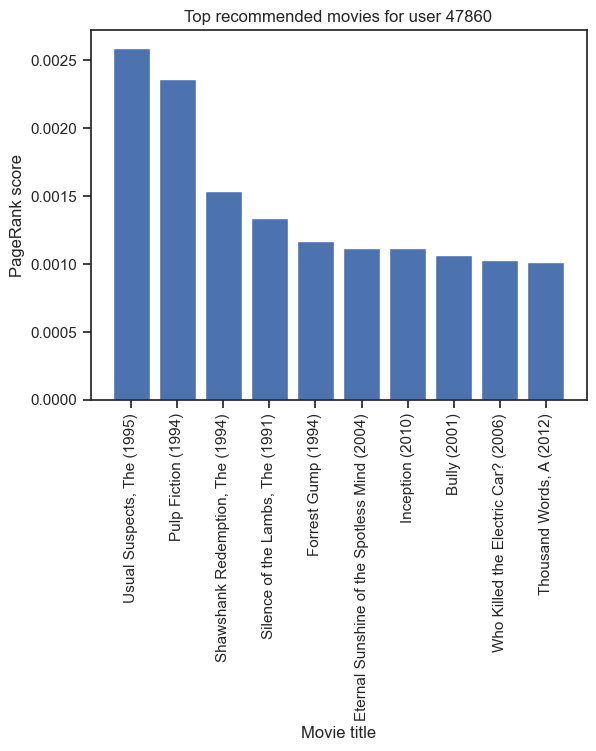

In [122]:
import matplotlib.pyplot as plt

recommended_movies_scores = [scores[movie] for movie in recommended_movies]
recommended_movies_titles = df[df['movieId'].isin(recommended_movies)]['title'].unique()

plt.bar(recommended_movies_titles, recommended_movies_scores)
plt.xticks(rotation=90)
plt.title(f"Top recommended movies for user {user}")
plt.xlabel("Movie title")
plt.ylabel("PageRank score")
plt.show()